# Lab1: Introduction to Tweepy, Twitter for Python
## Due: Midnight, Feb 2nd
In this lab, we will introduce Tweepy, an open-sourced Python Package to communicate with Twitter platform and use its API. We will teach you the how to use Tweepy to access Twitter data, such as user profiles and following list. In lab 2, we will further use Tweepy to collect Twitter network. We provide examples and most of the code for you. You will need to fill in some of the codes. You can also read the domcumentation of Tweepy to learn more about it: https://tweepy.readthedocs.io/en/latest/.


## Save Your Notebook! 
- Click on File (upper left corner), Select “Save and Checkpoint”.
- Important: You may loose your modification to a notebook if you do not Save it explicitly.**
- Advice: Save and Checkpoint often.  


## Submission
- Please follow the instructions and finish the exercises.
- After you finish the lab, please Click on File, Select “Download as”, Choose Notebook (.ipynb)
- After download is complete, Click on File, Select “Download as” again, Choose PDF via Latex (.pdf)
- Submit both the Notebook file and the PDF  File as your submission for Lab 1.





# 1. Preparation
Before we start to use the tweepy to collect information from twitter, we have some required preparations for environment and authentication credentials.
# 1.1. Install Tweepy
Tweepy could be easily installed with pip. In Azure Notebook, run the following code and the tweepy will be automatically installed. You may need wait for a few seconds for the installation.

In [1]:
!pip install tweepy

You should consider upgrading via the 'pip install --upgrade pip' command.


# 1.2. Install the requirement packages for this notebook
Apart from tweepy, several packages are also used here for visualization. 
- geopy is used to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.
- matplotlib is used to plot the figure
- 
Run this following code to install them. It takes **around five minutes to be installed**. If it finishes insallation, you should see the print finish installing the packages. Please be patient.

In [2]:
!pip install geopy
!pip install matplotlib
!pip install https://github.com/matplotlib/basemap/archive/master.zip
    
print('finish installing the packages')

     |████████████████████████████████| 102kB 986kB/s ta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
     / 170.6MB 551kB/ss   \ 10.3MB 2.5MB/s     \ 13.7MB 3.6MB/s     / 55.8MB 5.1MB/s     | 56.4MB 4.0MB/s[K     / 110.5MB 10.9MB/s     - 116.5MB 3.9MB/s     / 125.3MB 49.5MB/s[K     - 127.2MB 49.5MB/s     \ 129.3MB 558kB/s     | 157.6MB 5.5MB/s     \ 158.8MB 5.5MB/s     | 161.7MB 4.6MB/s/s     \ 166.7MB 551kB/s
     |████████████████████████████████| 10.1MB 183kB/s eta 0:00:01
     |████████████████████████████████| 225kB 35.4MB/s eta 0:00:01
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121744622 sha256=5d21b4c3c23db22e27988234a4fa1a9da34ec876d7d4cae10d4a6d875fc611ca
  Stored in directory: /tmp/pip-ephem-wheel-cache-u6pu3t0n/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1

# 1.3. Create Twitter API Authentication Credentials
Only tweepy is not enough for us to request information from twitter platform. Actually, tweepy is only a package which wraps the Twitter API for easier implement. And We are required to create the **authentication credentials** to use the API. These credentials are four text string:
1. Consumer key
2. Consumer secret
3. Access token
4. Access secret

If you already have a Twitter user account, then follow 3 steps to create the key, token, and secrets. Otherwise, you have to sign up as a Twitter user before proceeding.

### Step 1: Apply for a Twitter Developer Account
Go to the Twitter developer site (https://developer.twitter.com/) to apply for a developer account. 
### Step 2: Create an Application
Twitter grants authentication credentials to apps, not accounts. An app can be any tool or bot that uses the Twitter API. So you need to register your an app to be able to make API calls. To register your app, go to your Twitter apps page (https://developer.twitter.com/en/apps) and select the Create an app option.

You need to provide the following information about your app and its purpose:

1. **App name:** a name to identify your application (such as examplebot)
2. **Application description:** the purpose of your application (such as An example bot for a Real Python article)
3. **Website URL:** required, but here we don't need a URL to work, it can be any URL such as your personal site’s URL
4. **Use of the app**: Any description.

### Step 3: Get your Authentication Credentials
Go to your app page (https://developer.twitter.com/en/apps), whic shows:
<img width="1000">
Click **details**, you will find the  keys and tokens for authentication credentials

# 2. Using Tweepy
After attaining the authentication credentials, then we can set up teepy for crawling useful information.
## 2.1. Authentication
Two types of authentication: OAuth 1a and OAuth 2 are used in twitter. Here we only need OAuth 2 Authentication. <br>
We can finish the OAuth 2 authentication as the following code presents:

## Exercise 1
The overall code is to build an api object is shown here. <br>
Please fill in your CONSUEMER_KEY, CONSUMER_SECRET, ACCESS_TOKEN and ACCESS_TOKEN_SECRET into the code and run it. <br>
The expected output should be: `Authentication OK`

In [3]:
import tweepy

# fill in your own Twitter APP credentials
CONSUMER_KEY = "vEKTQn7DlXBAtKuciMORMyxS0" #?????????????????
CONSUMER_SECRET = "Hd6TK2w3MHdRqNewBcQOJYUEHV66bKZTL0B86feTSYHRPrfNzT" #??????????????????
ACCESS_TOKEN = "765609343014219776-xaCpzjREj6PsmlzWAcQUGYm6ASmbI6X" #???????????????
ACCESS_TOKEN_SECRET = "WnOezviikyVnFyY763bqou1jdIzzEgsUWkgwNaXhAs2uj" #????????????


# Authenticate to Twitter
auth = tweepy.OAuthHandler(consumer_key=CONSUMER_KEY, consumer_secret=CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN,ACCESS_TOKEN_SECRET)

# build a api object, and the introduction about the rate limit will be cover in next lab
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


## 2.2 Get profile
The following codes are used to crawl user profiles. The profile is stored in a dictionary, which covers fundamental attributes such as **id**, **screen_name** and **created_at**. The detailed description could be find in this [link](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/user-object).

In [4]:
# The eaist way to attatin your own profile call this function:
own_profile = api.me()

# own profile_is a user object, we can attain the attributes by calling own_profile.screen_name
print("own screen name: {}".format(own_profile.screen_name))

# The metadata is all reserved in json object (here is a dictionary).
# We can also get the attribute through the metadata in this way: own_profile._json["screen_name"]
print("The {} json file content:".format(own_profile._json["screen_name"]))
own_profile._json

own screen name: Linhan_cai
The Linhan_cai json file content:


{'id': 765609343014219776,
 'id_str': '765609343014219776',
 'name': 'Linhan Cai',
 'screen_name': 'Linhan_cai',
 'location': '',
 'profile_location': None,
 'description': '',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 0,
 'friends_count': 22,
 'listed_count': 0,
 'created_at': 'Tue Aug 16 18:01:06 +0000 2016',
 'favourites_count': 0,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 0,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': 'F5F8FA',
 'profile_background_image_url': None,
 'profile_background_image_url_https': None,
 'profile_background_tile': False,
 'profile_image_url': 'http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png',
 'profile_image_url_https': 'https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png',
 'profile_link_color': 

### short explanation
Please read the above output. The own_profile._json is in json format with key:value paris. You can use own_profile._json[key] to retrive the value. For example, to get the description, you can use own_profile._json['description']

## Exercise 2: Print the number of followers and friends of your own twitter account
In addition to screen_name, followers_count and friends_count are included in the user profiles. <br>
Please list the count of followers and friends_count presented in your own profile (You could choose other public users if you have privacy concern).<br>
The output should be in this format: <br>
`The followers_count of user ** is XXXX.` <br>
`The friends_count of user ** is XXXX.`

In [6]:
# TODO: Enter your code here:
print('The followers_count of user {} is {}'.format(own_profile.screen_name, own_profile._json['followers_count']))
print('The friends_count of user {} is {}'.format(own_profile.screen_name, own_profile._json['friends_count']))

The followers_count of user Linhan_cai is 0
The friends_count of user Linhan_cai is 22


### You can also input other user's id/user_id/screen_name to get their profile
For example

In [7]:
profile = api.get_user("realDonaldTrump")
print(profile.screen_name)

realDonaldTrump


## Save the profile with json
The user profile is sent to us from twitter in json format. We can save this in json file with json package: <br>
**Attention**: When you save the user profile, you are required to **save profile._json** which is the metadata of the profile

In [8]:
import json # import necessary package
import os

# build a directory to save the file
directory = "./results"
if(not os.path.exists(directory)):
    os.makedirs(directory)
    print("{} has been added".format(directory))
else:
    print("{} already existed".format(directory))
    
# save the user profile
own_profile_path = os.path.join(directory,"{}_profile.json".format(profile.screen_name))
with open(own_profile_path,"w") as f:
    json.dump(profile._json,f)
    print("{} has been saved".format(own_profile_path))

./results has been added
./results/realDonaldTrump_profile.json has been saved


### short explanation
Now you should see the folder named results and the file realDonaldTrump_profile.json in the folder. Please check the folder.

## Reload the saved files

In [9]:
with open(own_profile_path,'r') as f:
    profile = json.load(f)
    print("{} profile has been loaded".format(profile["screen_name"]))

realDonaldTrump profile has been loaded


# 2.3 Get user friends and followers
In this subsection, we show an example of crawling friends/followers of Donald Trump. Some exercises are required to complete. <br>
 **Be sure not to run this module too many times, because it easily hits the rate limit (api.friends and api.followers: up to 15 requests per 15 minutes).**

## 2.3.1 Basic functions
1. api.friends: crawl the the user's friends profiles
2. api.followers: crawl the user's followers profiles 

Here is an example :

In [10]:
# get firends with user_id/screen_name, the max count you can set is 200

screen_name = "realDonaldTrump" # You can replace the id/user_id/screen_name to any user's screen_name
friends = api.friends(screen_name=screen_name, count=200)  
print("The number of the collected friends profiles is: {}".format(len(friends)))

# show the first 10 screen_name of the friends of Trump
print("The first 10 collected friends' screen names are:")
for friend in friends[:10]:
    print(friend.screen_name)

# get followers with user_id/screen_name, the max count you can set is 200
followers = api.followers(screen_name=screen_name, count=200)
print("\nThe number of the collected followers profiles is: {}".format(len(followers)))
print("The first 10 collected followers' screen names are:")
for follower in followers[:10]:
    print(follower.screen_name)


The number of the collected friends profiles is: 47
The first 10 collected friends' screen names are:
JudgeJeanine
Jim_Jordan
MariaBartiromo
VP
GOPChairwoman
parscale
PressSec
TuckerCarlson
JesseBWatters
WhiteHouse

The number of the collected followers profiles is: 200
The first 10 collected followers' screen names are:
kindou51690864
EmilieRoussea15
mf_andrews
thegrummy1976
Rossolare1
prossynaikesa01
mjamexxx
IsbelleKyle
JosCarl30560598
XPIg2709FpZikbp


## 2.3.2 Cursor in tweepy, attain more friends/followers
The **max count** of profiles of friends and followers **per request is 200**. <br> 
In order to get more profiles, we need to use the **cursor function** to iteratively get profiles. <br>
In cursor, the initial function name is a parameter. <br>
The other parameters should be the same of the initial function. More detailed tutorial is [here](http://docs.tweepy.org/en/latest/cursor_tutorial.html).<br>
The example code is:


In [11]:
# Here we get the 500 followers of Trump
more_followers = []
for follower in tweepy.Cursor(api.followers,screen_name=screen_name,count=200).items(500): #without 500 it will try to get all the user profiles
    more_followers.append(follower)
print("With cursor, we have attained {} follower profiles".format(len(more_followers)))

With cursor, we have attained 500 follower profiles


## 2.3.3 Get ID of friends and followers instead of full profiles
Sometimes, we don't need the friends' user profiles instead we only need the their IDs. <br>
This is quite possibile becasue the **max count of IDs** of frirends and followers **per request is 5000**. <br>
We can use the following code:

In [12]:
# get friends ID
screen_name = "realDonaldTrump"
friends_id_list = api.friends_ids(screen_name,count=5000)

print("The number of friend IDs is: {}".format(len(friends_id_list)))
print("The first 10 friend IDs are:")
print(friends_id_list[:10])

# save friends ID
user_friends_path = os.path.join(directory,"{}_friends_id.json".format(screen_name))
with open(user_friends_path,"w") as f:
    json.dump(friends_id_list,f)
    print("friend IDs saved \n")

The number of friend IDs is: 47
The first 10 friend IDs are:
[29458079, 18166778, 208155240, 818910970567344128, 2353605901, 17685258, 818927131883356161, 22703645, 56561449, 822215673812119553]
friend IDs saved 



### Now we have get the friends IDs of Donald Trump and saved the file. You should see the file in the folder. This is how we get the friend list. In Lab 2, we will implemet BFS to traverse the Twitter network.  Note that though we set the count to 5000, but Donald Trump is only following 47 users. That's why we see the number of friend IDs is 47.

In [13]:
# get followers ID
followers_id_list = api.followers_ids(screen_name,count=5000)
print("The number of followers IDs is: {}".format(len(followers_id_list)))
print("The first 10 follower IDs are:")
print(followers_id_list[:10])

# save followers ID
user_followers_path = os.path.join(directory,"{}_followers_id.json".format(screen_name))
with open(user_followers_path,"w") as f:
    json.dump(followers_id_list,f)
    print("follower IDs saved")

The number of followers IDs is: 5000
The first 10 follower IDs are:
[486362125, 1223735368375308290, 1223727053805096960, 1223737684667092992, 1135270072610693120, 46618327, 718983447214206976, 1223737331154345985, 1072504849776947200, 1163047653325901825]
follower IDs saved


### Now we have get the 5000 follower IDs of Donald Trump and saved the file. You should see the file in the folder.

### Cursor to get complete IDs
Cursor could also applied to get complete IDs of the friends/followers. <br>
Here is an example to get 10000 followers of Trump.

In [14]:
more_followers_id = []
for followers_id in tweepy.Cursor(api.followers_ids,screen_name="realDonaldTrump",count=5000).items(10000):
     more_followers_id.append(followers_id)
print("With cursor, we obtain {} user followers IDs".format(len(more_followers_id)))

With cursor, we obtain 10000 user followers IDs


## Exercise 3: Play with the cursor to get all IDs of your friends and followers
1. Please following the steps of using the cursor, and collect **complete friends and followers IDs** of yourself or other user you are interested with.
2. After finishing the collection, save them into two json files as **section 2.3.3**. <br>
3. Please list the numbers of friends/followers IDs you have collected. Compare them with friends_count and followers_count you presented in EX2, which should be roughly equal.

**Tips:** Remember to set the count to 5000, if the number of your friends and followers are large.

In [15]:
# TO DO: Enter your code here

my_name = api.me().screen_name

# get friends IDs
my_friends_id = []
for friends_id in tweepy.Cursor(api.friends_ids,screen_name=my_name,count=5000).items(10000):
    my_friends_id.append(friends_id)
print("With cursor, we obtain {} friends ids".format(len(my_friends_id)))

# get followers IDs
my_followers_id = []
for followers_id in tweepy.Cursor(api.followers_ids,screen_name=my_name,count=5000).items(10000):
     my_followers_id.append(followers_id)
print("With cursor, we obtain {} followers IDs".format(len(my_followers_id)))

# save friends IDs
my_friends_path = os.path.join(directory,"{}_friends_id.json".format(my_name))
with open(my_friends_path,"w") as f:
    json.dump(my_friends_id,f)
    print("friend IDs saved")
    
# save followers IDs
my_followers_path = os.path.join(directory,"{}_followers_id.json".format(my_name))
with open(my_followers_path,"w") as f:
    json.dump(my_followers_id,f)
    print("follower IDs saved")

With cursor, we obtain 22 friends ids
With cursor, we obtain 0 followers IDs
friend IDs saved
follower IDs saved


## 2.3.4 A trick to get the user followers/friends profiles quciker
We could directly get the followers/friends profiles through api.friends and api.followers. However, with this function we are limited to attain 15 * 200 profiles per 15 minutes. Here following these two steps, we could speed up this collecting process.
1. Obtain the followers/friends IDs (max rate: 15 * 5000 per 15 minutes)
2. Split the IDs with n chunks, that each contains 100 IDs.
3. Get the followers/friends profiles with api.lookup_users (max rate: 900 * 100 per 15 minutes)

With this trick, we can get 75000 user profiles per 15 minutes

In [16]:
# This function is used to split the followers id into chuncks, with each chunk having 100 IDs
def split2chunks(more_followers_id):
    chunks = []
    for i in range(0,len(more_followers_id),100):
        if(i+100 < len(more_followers_id)):
            chunks.append(more_followers_id[i:i+100])
        else:
            chunks.append(more_followers_id[i:])
    return chunks

In [17]:
# 1. IDs have been attained, here we do it again. We get 10000 followers of realDonaldTrump
screen_name = "realDonaldTrump"
more_followers_id = []
for followers_id in tweepy.Cursor(api.followers_ids,screen_name=screen_name,count=5000).items(10000):
     more_followers_id.append(followers_id)

In [18]:
# 2. split the list of ID into chunks: we call the function split2chunks to do this
more_followers_chunks = split2chunks(more_followers_id)

In [19]:
# 3. Get the followers profiles. The profiles are in more_followers.
more_followers = []

for i,chunk in enumerate(more_followers_chunks):
    more_followers += api.lookup_users(chunk)
    print("{} chunks has been processed".format(i))

0 chunks has been processed
1 chunks has been processed
2 chunks has been processed
3 chunks has been processed
4 chunks has been processed
5 chunks has been processed
6 chunks has been processed
7 chunks has been processed
8 chunks has been processed
9 chunks has been processed
10 chunks has been processed
11 chunks has been processed
12 chunks has been processed
13 chunks has been processed
14 chunks has been processed
15 chunks has been processed
16 chunks has been processed
17 chunks has been processed
18 chunks has been processed
19 chunks has been processed
20 chunks has been processed
21 chunks has been processed
22 chunks has been processed
23 chunks has been processed
24 chunks has been processed
25 chunks has been processed
26 chunks has been processed
27 chunks has been processed
28 chunks has been processed
29 chunks has been processed
30 chunks has been processed
31 chunks has been processed
32 chunks has been processed
33 chunks has been processed
34 chunks has been proce

## 2.3.5 Get friends/followers locations
Now we have get 10000 followers of Donald Trump. Let's analyze where these followers come from. The location is covered in the user object, with tweepy we can get the locations as:

In [20]:
from collections import Counter
cities = Counter()  # A Counter is a container that keeps track of how many times equivalent values are added. 
for follower in more_followers:
    if(follower.location):  # if the location exists
        cities.update([follower.location])  # add the location into the cities
print("{} unique locations found in their profiles".format(len(cities)))

1574 unique locations found in their profiles


### Visualize the location of followers
matplotlib and geogy are used for the locations visualization. Here, we build a function to visualize the locations of the users. <br>

In [21]:
def loc_visualize(cities,most_common):
    import matplotlib.pyplot as plt
    from mpl_toolkits.basemap import Basemap
    from geopy.geocoders import Nominatim
    import geopy
    import math
    import time

    scale = 2
    plt.figure(figsize=(10,7))

    map = Basemap()

    # draw the world map with coast lines 
    map.drawmapboundary()
    map.fillcontinents()
    map.drawcoastlines()

    # Get the location of each city and plot it
    geolocator = Nominatim()
    for i,(city,count) in enumerate(cities.most_common(most_common)):
        if(i % 20 ==19):
            print("we have attained {} geocodes".format(i+1))
        try:
            loc = geolocator.geocode(city)
            time.sleep(1)
            if(loc):
                x, y = map(loc.longitude, loc.latitude)
                map.plot(x,y,marker='o',color='Red',markersize=int(math.sqrt(count))*scale)
        except KeyboardInterrupt:
            break
        except:
            print("one error appears to get the longitude and latitude of {}".format(city))
            pass

    plt.show()

### Next, we plot the most 60 frequent places of the follower locations that we have collected. It may takes 2 minutes to complete this cell. After it finishes, you should see a map with red dots on it. The larger the dot is, the more frequent users are in this location. If you do not see a map, it may due to a bug of notebook. You can re-run it.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:20: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


we have attained 20 geocodes
we have attained 40 geocodes
we have attained 60 geocodes


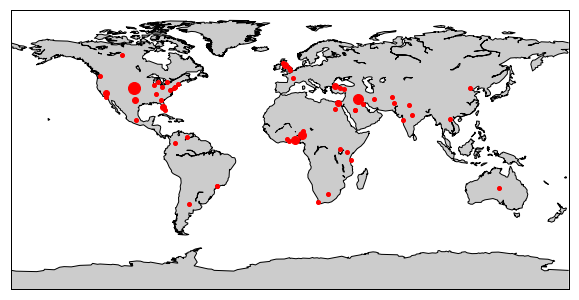

In [23]:
loc_visualize(cities,60)

## Exercise 4: Visualize the locations of IST followers.
Here you are required to complete the following code to visualize the locations of IST twitter followers(@ISTatPENNSTATE). IST currently have around 9151 followers. You can refer to 2.3.4 and 2.3.5 for help.


In [25]:
screen_name = "ISTatPENNSTATE"
# TODO: 1. Fill the code of collecting all follower IDs

IST_followers_ids = []
for followers_id in tweepy.Cursor(api.followers_ids,screen_name=screen_name,count=5000).items():
     IST_followers_ids.append(followers_id)
print("the number of obtained followers ids is: {}".format(len(IST_followers_ids)))

the number of obtained followers ids is: 9173


In [26]:
IST_followers_chunks = split2chunks(IST_followers_ids)
IST_followers = []

# 2. Fill the code of collecting the profiles
for i,chunk in enumerate(IST_followers_chunks):
    IST_followers += api.lookup_users(chunk)
    print("{} chunks has been processed".format(i))
    
print("{} follower profiles has been attained".format(len(IST_followers)))

0 chunks has been processed
1 chunks has been processed
2 chunks has been processed
3 chunks has been processed
4 chunks has been processed
5 chunks has been processed
6 chunks has been processed
7 chunks has been processed
8 chunks has been processed
9 chunks has been processed
10 chunks has been processed
11 chunks has been processed
12 chunks has been processed
13 chunks has been processed
14 chunks has been processed
15 chunks has been processed
16 chunks has been processed
17 chunks has been processed
18 chunks has been processed
19 chunks has been processed
20 chunks has been processed
21 chunks has been processed
22 chunks has been processed
23 chunks has been processed
24 chunks has been processed
25 chunks has been processed
26 chunks has been processed
27 chunks has been processed
28 chunks has been processed
29 chunks has been processed
30 chunks has been processed
31 chunks has been processed
32 chunks has been processed
33 chunks has been processed
34 chunks has been proce

2296 unique locations found in their profiles


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:20: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


we have attained 20 geocodes
we have attained 40 geocodes
we have attained 60 geocodes


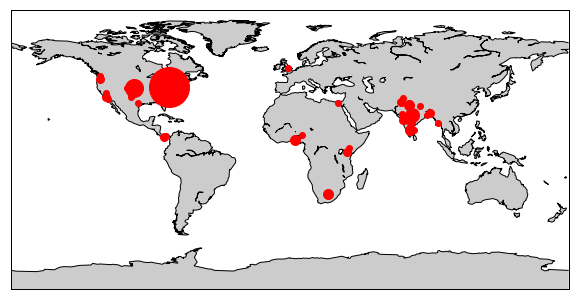

In [27]:
# run this cell to visualize the most 60 frequent locations
from collections import Counter
cities = Counter()
for follower in IST_followers:
    if(follower.location):
        cities.update([follower.location])
print("{} unique locations found in their profiles".format(len(cities)))

loc_visualize(cities,60)

# 2.4 Get user timeline
Get timelilne with id/user_id/screen_name, we can set the **count from 0 to 100.**

In [28]:
screen_name = "realDonaldTrump"
timeline = api.user_timeline(screen_name=screen_name, count=100) 
print("The number of timeline we collect is {}".format(len(timeline)))
for status in timeline:
    print(status._json['text'])

The number of timeline we collect is 100
Such a great, common sense, question. Crazy! https://t.co/i13tgw24wN
RT @Lrihendry: WOW! Mr President, this woman, Lynn, has never voted in her entire life until she was 59 years old. At the time she voted fo…
RT @IamAllOutOfGum: @Lrihendry @PlaysTrumpCard @realDonaldTrump @AnthemRespect @bfraser747 @ROHLL5 @atensnut @CarmineSabia @oUSA_JEDIo @car…
RT @PlaysTrumpCard: @realDonaldTrump We support you because we know your heart is in the right place, and greatly appreciate what an incred…
RT @Lrihendry: Fascinating paradox: the more President Trump gets investigated, the more crimes are exposed involving prominent Democrats.
Getting a little exercise this morning! https://t.co/fyAAcbhbgk
RT @SeanDNaylor: U.S. killed a top al-Qaeda leader in Yemen, reports say https://t.co/MVV9dTl721 via @Yahoo
RT @Rita_Katz: 6)Of all living #AlQaeda leaders, al-Rimi was the most compelling, known for his charisma &amp; beloved across the AQ community.…
RT @Rita_Ka

## Exercise 5: get the most recent 100 tweets of IST twitter (@ISTatPENNSTATE) using the timeline

In [29]:
## TODO: Enter your code here

screen_name = "ISTatPENNSTATE"

timeline = api.user_timeline(screen_name=screen_name, count=100) 
print("The number of timeline we collect is {}".format(len(timeline)))
for status in timeline:
    print(status._json['text'])

The number of timeline we collect is 100
RT @PSU_Undergrad: Better navigate the world of research opportunities at #PennState by learning more at one of the workshops being offered…
Learn more about #lifeatgt at the @GrantThornton info table in the 2nd floor hallway Westgate today! Reps will be t… https://t.co/FiwhVQydBw
RT @PSUNittanyAI: 🚨 Don't delay, submit today ➡ https://t.co/h8kobAvCt6
The #PennState #NittanyAI Challenge idea proposals are due TOMORROW…
It's #ThankYourMentor Day! Tag someone from the College of IST who served as a #mentor to you to say "THANKS" and l… https://t.co/bSDj9i8DDr
Join @Deloitte for 1:1 networking during next week's Coffee Chat at Westgate! Meet with recruiters and learn more a… https://t.co/sHQHEM0SZH
RT @penn_state: What does “digital footprint” mean?
How do I manage my digital footprint?
How can I keep my information private?

Answers t…
IST's James Wang and Yu Luo presented their @PSUresearch on robotics at an meeting last fall organized by Amazon 